In [1]:
# https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
'''
this one is simple auto encoder, without padding
'''

'\nthis one is simple auto encoder, without padding\n'

In [3]:
import os

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# root_path = r'gdrive/My Drive/work/research/AutoEncoder_classification/'  #change dir to your project folder

# os.chdir(root_path)

In [5]:
from tensorflow.keras.datasets import cifar10

import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import matplotlib.pyplot as plt
import cv2

### 01 Get the data

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print(x_train.shape)

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.


(50000, 32, 32, 3)


In [8]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 02 Create and train the model

In [9]:
# input_img = keras.Input(shape=x_train[0].shape)

# x = layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same')(input_img)
# x = layers.BatchNormalization() (x)
# x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
# x = layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
# encoded = layers.BatchNormalization() (x)

# # encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# # x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2,2))(encoded)
# x = layers.Conv2D(32, (3, 3),strides=1, activation='relu',padding='same')(x)
# x = layers.BatchNormalization() (x)

# decoded = layers.Conv2D(3, (1, 1),strides=1, activation='sigmoid', padding='same')(x)

# autoencoder = keras.Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
# autoencoder.summary()

In [10]:
input_img = keras.Input(shape=x_train[0].shape)





x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         435       
Total params: 3,203
Trainable params: 3,203
Non-trainable params: 0
___________________________________________________________

In [11]:
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
391/391 [==============================] - 26s 62ms/step - loss: 0.6128 - val_loss: 0.5597
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 0.5579 - val_loss: 0.5568
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.5553 - val_loss: 0.5548
Epoch 4/10
391/391 [==============================] - 19s 50ms/step - loss: 0.5544 - val_loss: 0.5540
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.5526 - val_loss: 0.5534
Epoch 6/10
391/391 [==============================] - 14s 37ms/step - loss: 0.5522 - val_loss: 0.5531
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.5519 - val_loss: 0.5527
Epoch 8/10
391/391 [==============================] - 15s 37ms/step - loss: 0.5519 - val_loss: 0.5524
Epoch 9/10
391/391 [==============================] - 14s 37ms/step - loss: 0.5516 - val_loss: 0.5522
Epoch 10/10
391/391 [==============================] - 16s 41ms/step - loss: 0.550

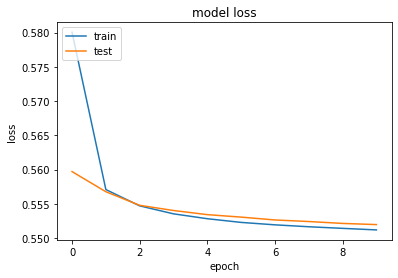

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

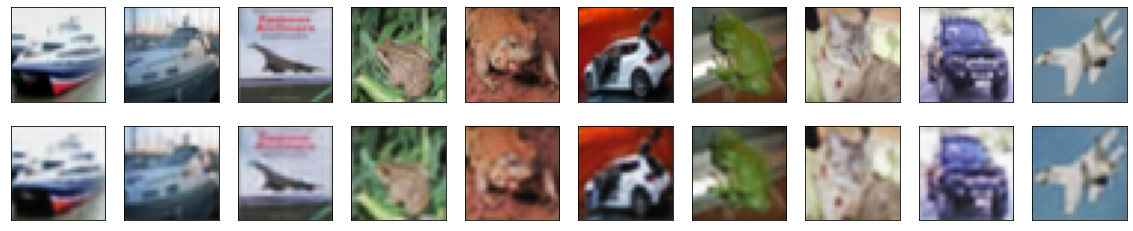

In [13]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [15]:
autoencoder.save("models/btch_norm_autoenc_simple.h")

INFO:tensorflow:Assets written to: models/btch_norm_autoenc_simple.h/assets


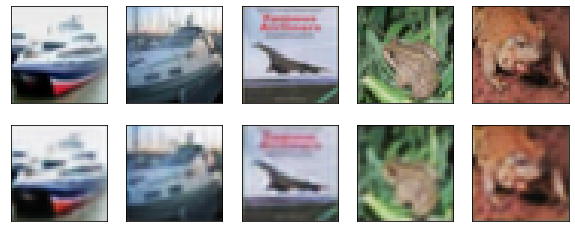

In [14]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(10, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("figures/decodedvsoriginal_simple.svg")


In [ ]:
y_test[0]

#### 02a Save the encoder part

In [16]:
encoder = Model(inputs=input_img, outputs=encoded)
encoder.save('models/btch_norm_encoder_simple.h5')

### 03 Test encoded images with a LogReg

In [ ]:
def flatten_encoded_images_for_logreg(X_array):
    print(X_array.shape)
    X_array_flattened=[]
    for i in range(X_array.shape[0]):
        X_array_flattened.append(X_array[i].flatten())
    X_array_flattened=np.array(X_array_flattened)
    print("Shape is ",X_array_flattened.shape)
    return X_array_flattened

In [ ]:
# load the model from file
encoder = load_model('models/encoder_simple.h5')
# encode the train data
x_train_encode = encoder.predict(x_train)
x_train_encode_flat=flatten_encoded_images_for_logreg(x_train_encode)

# x_train_encode=x_train_encode.flatten()
print("Shape of encoded flat",x_train_encode_flat.shape)
# encode the test data
x_test_encode = encoder.predict(x_test)
x_test_encode_flat=flatten_encoded_images_for_logreg(x_test_encode)
print("Shape of encoded flat",x_test_encode.shape)



In [ ]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(x_train_encode_flat, y_train)
# make predictions on the test set
yhat = model.predict(x_test_encode_flat)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

### 04 Test encoded images with a CNN

In [ ]:
# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

#### 04a Convert y values to categorical

In [17]:
#one-hot encode target column
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot.shape,y_test_one_hot.shape)

(50000, 10) (10000, 10)


#### 04b Extract features using encoder

In [18]:
# load the model from file
encoder = load_model('models/btch_norm_encoder_simple.h5')
# encode the train data
x_train_encode = encoder.predict(x_train)
print("Shape of training encoded images",x_train_encode.shape)

# encode the test data
x_test_encode = encoder.predict(x_test)
print("Shape of testing encoded images",x_test_encode.shape)


Shape of training encoded images (50000, 16, 16, 16)
Shape of testing encoded images (10000, 16, 16, 16)


In [19]:
print(x_train_encode[0].shape,x_test_encode[1].shape)

(16, 16, 16) (16, 16, 16)


### 04c create a CNN that takes encoded image as input

In [20]:
def get_model(x_train):
    # define a CNN to make the predictions
    #create model
    model = Sequential()#add model layers
    model.add(Conv2D(24, kernel_size=5, padding="same", activation='relu', input_shape=x_train[0].shape))
    model.add(MaxPool2D())
    model.add(Conv2D(48, kernel_size=5, padding="same", activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(64, kernel_size=5, padding="same", activation='relu'))
    model.add(MaxPool2D(padding='same'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    
    return model
    
# from: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
def define_model_VGG3(x_train):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=x_train[0].shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [21]:
acc_list=[]
for i in range(5):
    model=define_model_VGG3(x_train_encode)
    # print(model.summary())
    #train the model
    num_epochs=100
    history=model.fit(x_train_encode, y_train_one_hot, validation_data=(x_test_encode, y_test_one_hot), epochs=num_epochs,verbose=0)
    loss,acc=model.evaluate(x_test_encode, y_test_one_hot)
    print("Accuracy is ",acc)
    acc_list.append(acc)


Epoch 1/100
1563/1563 [==============================] - 27s 17ms/step - loss: 2.1264 - accuracy: 0.1985 - val_loss: 1.6947 - val_accuracy: 0.3811
Epoch 2/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7060 - accuracy: 0.3581 - val_loss: 1.4858 - val_accuracy: 0.4551
Epoch 3/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5403 - accuracy: 0.4280 - val_loss: 1.3984 - val_accuracy: 0.4855
Epoch 4/100
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4465 - accuracy: 0.4685 - val_loss: 1.2987 - val_accuracy: 0.5289
Epoch 5/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3709 - accuracy: 0.4972 - val_loss: 1.2279 - val_accuracy: 0.5582
Epoch 6/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3193 - accuracy: 0.5183 - val_loss: 1.1963 - val_accuracy: 0.5745
Epoch 7/100
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2698 - accuracy: 0.5406 - val_loss: 1

1563/1563 [==============================] - 25s 16ms/step - loss: 0.5568 - accuracy: 0.8016 - val_loss: 0.6706 - val_accuracy: 0.7776
Epoch 57/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5462 - accuracy: 0.8063 - val_loss: 0.7235 - val_accuracy: 0.7643
Epoch 58/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5428 - accuracy: 0.8070 - val_loss: 0.6873 - val_accuracy: 0.7663
Epoch 59/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5351 - accuracy: 0.8103 - val_loss: 0.6721 - val_accuracy: 0.7747
Epoch 60/100
1563/1563 [==============================] - 26s 16ms/step - loss: 0.5402 - accuracy: 0.8088 - val_loss: 0.6686 - val_accuracy: 0.7751
Epoch 61/100
1563/1563 [==============================] - 26s 16ms/step - loss: 0.5288 - accuracy: 0.8135 - val_loss: 0.6657 - val_accuracy: 0.7750
Epoch 62/100
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5228 - accuracy: 0.8122 - val_loss: 0.6686 

In [23]:
print(sum(acc_list)/len(acc_list))


0.784600019454956


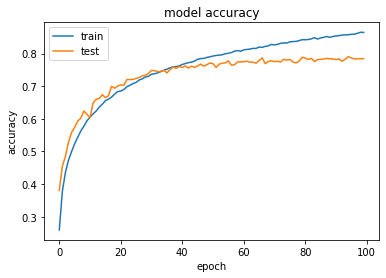

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()